# 机器学习在天文学上的应用(回归)

- 预测光度红移

** 导入模块 **

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

import time

** 加载数据 **

In [2]:
data = pd.read_csv("../DATA/Skyserver_SQL12-17-2017 8-08-16 AM.csv")

In [3]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,20.845684,14.792084,19.58182,19.23953,19.01517,18.68266,18.72929,1043,301,4,136,4.775215e+17,QSO,1.562440,424,51893,509
1,1.237650e+18,20.947040,14.688401,18.49116,17.35230,16.93062,16.74545,16.69552,1043,301,4,137,4.775196e+17,STAR,-0.000262,424,51893,502
2,1.237650e+18,20.990168,14.698041,19.52166,17.50852,16.37234,15.88912,15.49690,1043,301,4,137,4.775355e+17,GALAXY,0.138471,424,51893,560
3,1.237650e+18,21.342225,14.838720,16.54180,14.56397,13.62619,13.21625,12.80264,1043,301,4,139,4.775416e+17,GALAXY,0.021864,424,51893,582
4,1.237650e+18,21.371400,14.785359,19.18550,18.55105,18.45699,18.57999,18.34154,1043,301,4,139,4.775449e+17,QSO,0.799702,424,51893,594


** 数据预处理 **

In [3]:
N = data.shape[0]

# shuffle data
np.random.seed(0)
#np.random.shuffle(data)

# put colors in a matrix
X = np.zeros((N, 4))
X[:, 0] = data['u'] - data['g']
X[:, 1] = data['g'] - data['r']
X[:, 2] = data['r'] - data['i']
X[:, 3] = data['i'] - data['z']
z = data['redshift']

In [4]:
Ntrain = int(N*0.80)
Xtrain = X[:Ntrain]
ztrain = z[:Ntrain]

Xtest = X[Ntrain:]
ztest = z[Ntrain:]

** 训练模型 **

In [5]:
n_neighbors = 5

model = KNeighborsRegressor(n_neighbors, weights='uniform')
model = model.fit(Xtrain, ztrain)

** 模型预测 **

In [6]:
zpred=model.predict(Xtest)

In [7]:
rms = np.sqrt(np.mean((ztest - zpred) ** 2))
print("RMS error = %.2g" % rms)

RMS error = 0.23


** 画图 **

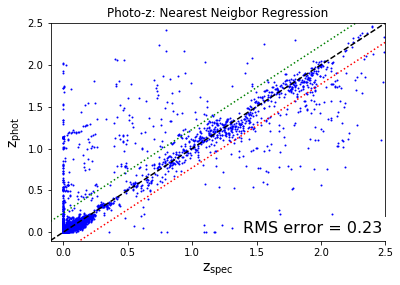

In [8]:
axis_lim = np.array([-0.1, 2.5])
ax = plt.axes()
plt.scatter(ztest, zpred, c='b', lw=0, s=4)
plt.plot(axis_lim, axis_lim, '--k')
plt.plot(axis_lim, axis_lim + rms, ':g')
plt.plot(axis_lim, axis_lim - rms, ':r')
plt.xlim(axis_lim)
plt.ylim(axis_lim)

plt.text(0.99, 0.02, "RMS error = %.2g" % rms,
         ha='right', va='bottom', transform=ax.transAxes,
         bbox=dict(ec='w', fc='w'), fontsize=16)

plt.title('Photo-z: Nearest Neigbor Regression')
plt.xlabel(r'$\mathrm{z_{spec}}$', fontsize=14)
plt.ylabel(r'$\mathrm{z_{phot}}$', fontsize=14)
plt.show()

** 多模型**

In [9]:
def models(regs):
    for regression in regs:
        t0 = time.time()
        model = regression()
        model = model.fit(Xtrain, ztrain)
        print("run time = %0.2f s" % (time.time() - t0))
        zpred=model.predict(Xtest)
        
        rms = np.sqrt(np.mean((ztest - zpred) ** 2))
        print(regression.__name__ + " RMS error = %.2g" % rms)
        axis_lim = np.array([-0.1, 2.5])
        ax = plt.axes()
        plt.scatter(ztest, zpred, c='b', lw=0, s=4)
        plt.plot(axis_lim, axis_lim, '--k')
        plt.plot(axis_lim, axis_lim + rms, ':g')
        plt.plot(axis_lim, axis_lim - rms, ':r')
        plt.xlim(axis_lim)
        plt.ylim(axis_lim)

        plt.text(0.99, 0.02, "RMS error = %.2g" % rms,
                 ha='right', va='bottom', transform=ax.transAxes,
                 bbox=dict(ec='w', fc='w'), fontsize=16)

        plt.title(regression.__name__)
        plt.xlabel(r'$\mathrm{z_{spec}}$', fontsize=14)
        plt.ylabel(r'$\mathrm{z_{phot}}$', fontsize=14)
        plt.show()

** 结果**

run time = 0.08 s
KNeighborsRegressor RMS error = 0.23


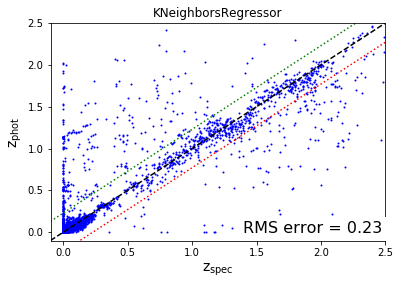

run time = 0.45 s
DecisionTreeRegressor RMS error = 0.34


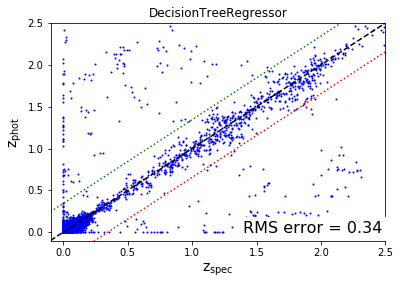

run time = 2.57 s
RandomForestRegressor RMS error = 0.25


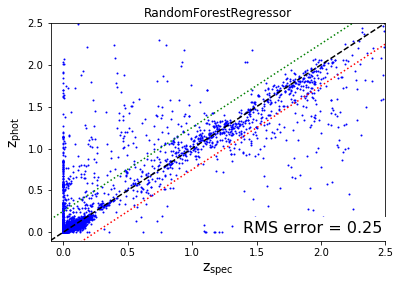

run time = 0.03 s
LinearRegression RMS error = 0.37


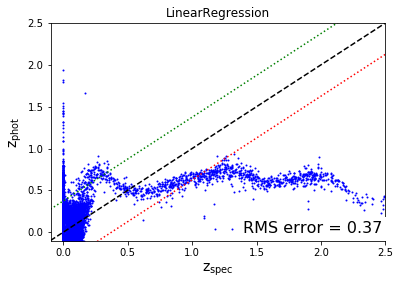

In [10]:
regs = ((KNeighborsRegressor), (tree.DecisionTreeRegressor), (RandomForestRegressor),(LinearRegression))
models(regs)